In [1]:
import tsfel 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
#get raw measurements
def getAccX(df): return df["AccX(g)"]
def getAccY(df): return df["AccY(g)"]
def getAccZ(df): return df["AccZ(g)"]
def getAsX(df): return df["AsX(°/s)"]
def getAsY(df): return df["AsY(°/s)"]
def getAsZ(df): return df["AsZ(°/s)"]
#def getAngleX(df): return df["AngleX(°)"]
#def getAngleY(df): return df["AngleY(°)"]
#def getAngleZ(df): return df["AngleZ(°)"]

def mag(df):
  try:
    return(np.sqrt(df["AccX(g)"] **2  + df["AccY(g)"] **2  + df["AccZ(g)"] ** 2))
  except:
    return(np.sqrt(df["Acceleration X(g)"] **2  + df["Acceleration Y(g)"] **2  + df["Acceleration Z(g)"] ** 2))

def enmo(x):
  return mag(x) - 1

In [5]:
#defining all features 
cfg = tsfel.get_features_by_domain()
temp = tsfel.get_features_by_domain("temporal")
spec = tsfel.get_features_by_domain("spectral")
frac = tsfel.get_features_by_domain("fractal")
stat = tsfel.get_features_by_domain("statistical")


In [11]:
# extracting csv file 
file_name = "data/brush/aa_091524_norm/aa_091524_normbrush_1.csv"
df = pd.read_csv(file_name)
sig = enmo(df)
features = tsfel.time_series_features_extractor(spec, sig, fs=98)
display(features)

,0_Fundamental frequency,0_Human range energy,0_LPCC_0,0_LPCC_1,0_LPCC_10,0_LPCC_11,0_LPCC_2,0_LPCC_3,0_LPCC_4,0_LPCC_5,...,0_Wavelet standard deviation_8.17Hz,0_Wavelet variance_12.25Hz,0_Wavelet variance_2.72Hz,0_Wavelet variance_24.5Hz,0_Wavelet variance_3.06Hz,0_Wavelet variance_3.5Hz,0_Wavelet variance_4.08Hz,0_Wavelet variance_4.9Hz,0_Wavelet variance_6.13Hz,0_Wavelet variance_8.17Hz
0,0.016076,0.019932,0.176125,0.729912,0.399964,0.729912,0.399964,0.287586,0.068197,0.0014,...,0.477295,0.126484,0.137817,0.038598,0.187733,0.248748,0.296116,0.300419,0.27196,0.22781


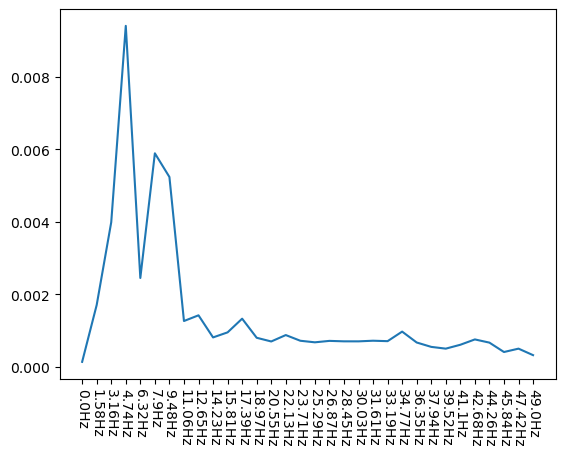

In [12]:
hist = tsfel.feature_extraction.features.spectrogram_mean_coeff(sig, fs=98)
plt.plot(hist["names"], hist["values"])
plt.xticks(rotation=270)
plt.show()

In [13]:
import tsfel.feature_extraction.features as tfeat 

dom_freq = tfeat.fundamental_frequency(sig,fs=98)
print(dom_freq)

0.016076115485564306


In [15]:
norm = []
bk = []
with open("data.txt", "r") as data:
    f = data.readlines()
    for file in f: 
        comp = file.split("_")
        if f.index(file) != len(f)-1 and file.endswith(".csv\n"):
            if comp[2] == "bk":
                bk.append("data/"+(file[:-1]))
            else:
                norm.append("data/"+(file[:-1]))
        elif file.endswith(".csv"): 
            if comp[2] == "bk":
                bk.append("data/"+(file))
            else:
                norm.append("data/"+(file))
matrix_n = []
matrix_b = []
titles = []
for n in norm:
    df = pd.read_csv(n)
    data = enmo(df)
    features = tsfel.time_series_features_extractor(cfg, data, fs=98)
    cal = features.values
    matrix_n.append(cal)
    titles.extend(features.columns)
mat_n = np.vstack(matrix_n)
avg_n = []

for b in bk:
    df = pd.read_csv(b)
    data = enmo(df)
    features = tsfel.time_series_features_extractor(cfg, data, fs=98)
    cal = features.values
    matrix_b.append(cal)
mat_b = np.vstack(matrix_b)
avg_b = []

for i in range(156):
    avg_b.append(np.average(mat_b[:,i]))
    avg_n.append(np.average(mat_n[:,i]))
    


FileNotFoundError: [Errno 2] No such file or directory: 'data/data\\brush\\aa_091524_norm\\aa_091524_normbrush_1.csv'

In [43]:
t = titles[:156]
normal = np.array(avg_n)
brady = np.array(avg_b) 
change = np.log(np.abs(brady - normal))
feat = t[np.where(change==max(abs(change)))[0][0]]
print(feat)

0_Spectral distance


Text(0.5, 1.0, 'Bar Graph for Normal and Bradykinesia')

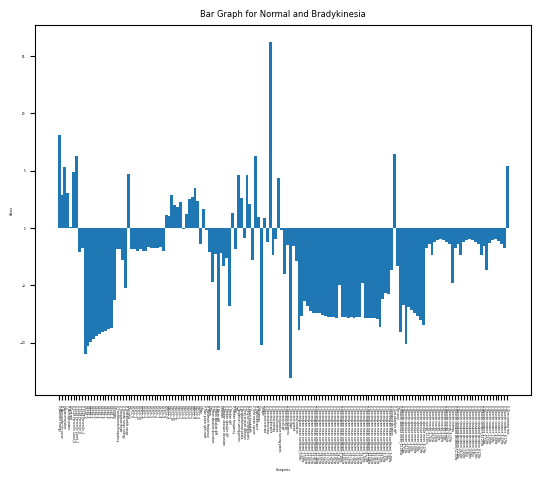

In [44]:
plt.bar(t, change, width=1)

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Values')
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation=270)
plt.title('Bar Graph for Normal and Bradykinesia')


/var/folders/3m/pkbjl2xd32x5jfm99g385c1m0000gn/T/ipykernel_8074/4202250018.py:1: RuntimeWarning: invalid value encountered in log
  plt.bar(t, np.log(avg_b), width=1, label = "bradykinesia")
/var/folders/3m/pkbjl2xd32x5jfm99g385c1m0000gn/T/ipykernel_8074/4202250018.py:2: RuntimeWarning: invalid value encountered in log
  plt.bar(t, np.log(avg_n), width=1, label ="normal")


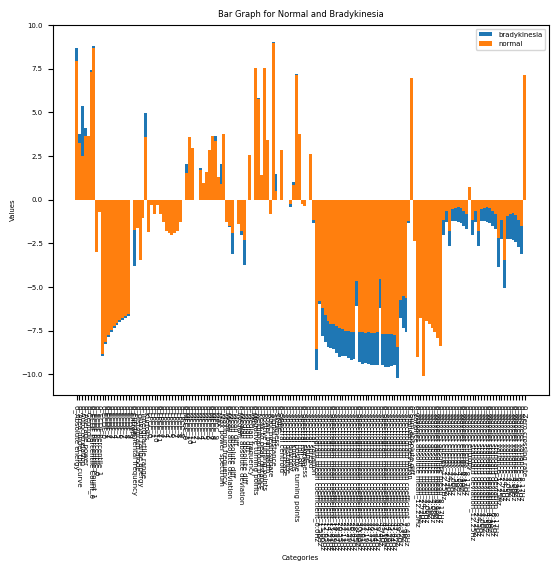

In [45]:
plt.bar(t, np.log(avg_b), width=1, label = "bradykinesia")
plt.bar(t, np.log(avg_n), width=1, label ="normal")

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Values')
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation=270)
plt.title('Bar Graph for Normal and Bradykinesia')
plt.legend()
plt.show()

/var/folders/3m/pkbjl2xd32x5jfm99g385c1m0000gn/T/ipykernel_8074/1004402387.py:1: RuntimeWarning: invalid value encountered in log
  plt.bar(t, np.log(avg_b), width=1, label = "bradykinesia")
/var/folders/3m/pkbjl2xd32x5jfm99g385c1m0000gn/T/ipykernel_8074/1004402387.py:2: RuntimeWarning: invalid value encountered in log
  plt.bar(t, np.log(avg_n), width=1, label ="normal")


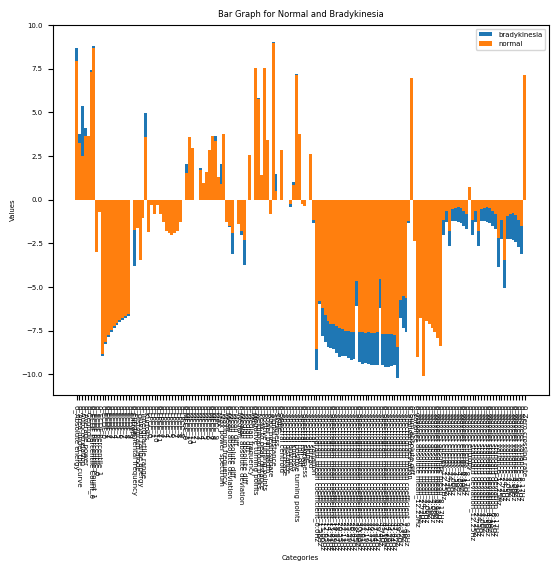

In [46]:
plt.bar(t, np.log(avg_b), width=1, label = "bradykinesia")
plt.bar(t, np.log(avg_n), width=1, label ="normal")

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Values')
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation=270)
plt.title('Bar Graph for Normal and Bradykinesia')
plt.legend()
plt.show()



In [49]:
sort_c = np.sort(change, kind="mergesort")
arr_t = np.array(t)
real_feat = []
comp_fact_n = []
comp_fact_b = []
for a in sort_c[-20:]:
    real_feat.append(arr_t[np.where(change==a)[0][0]])
    comp_fact_n.append(normal[np.where(change==a)[0][0]])
    comp_fact_b.append(brady[np.where(change==a)[0][0]])


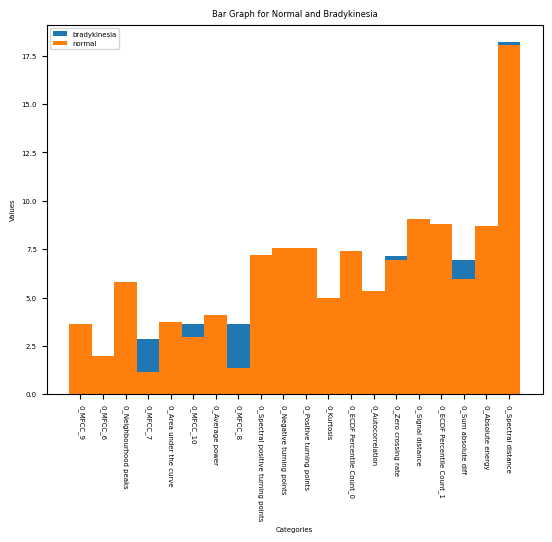

In [51]:
plt.bar(real_feat, np.log(abs(np.array(comp_fact_n))), width=1, label = "bradykinesia")
plt.bar(real_feat, np.log(abs(np.array(comp_fact_b))), width=1, label ="normal")

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Values')
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation=270)
plt.title('Bar Graph for Normal and Bradykinesia')
plt.legend()
plt.show()


In [30]:
#study to the variables and features that are most constant 
norm = []
bk = []
with open("data.txt", "r") as data:
    f = data.readlines()
    for file in f: 
        comp = file.split("_")
        if f.index(file) != len(f)-1 and file.endswith(".csv\n"):
            if comp[2] == "bk":
                bk.append("data/"+(file[:-1]))
            else:
                norm.append("data/"+(file[:-1]))
        elif file.endswith(".csv"): 
            if comp[2] == "bk":
                bk.append("data/"+(file))
            else:
                norm.append("data/"+(file))
matrix_n = []
matrix_b = []
titles = []
for n in norm:
    df = pd.read_csv(n)
    data = enmo(df)
    features = tsfel.time_series_features_extractor(cfg, data, fs=98)
    cal = features.values
    matrix_n.append(cal)
    titles.extend(features.columns)

for b in bk:
    df = pd.read_csv(b)
    data = enmo(df)
    features = tsfel.time_series_features_extractor(cfg, data, fs=98)
    cal = features.values
    matrix_b.append(cal)

avg_n = []
avg_b = []
if len(matrix_n) != 0 and len(matrix_b) !=0:
    mat_n = np.vstack(matrix_n)
    mat_b = np.vstack(matrix_b)
    diff_mat_n = np.diff(mat_n, axis = 1)
    diff_mat_b = np.diff(mat_b, axis = 1)
else:
    mat_n = np.vstack(matrix_n)
    diff_mat_n = np.diff(mat_n, axis = 0)
print(mat_n.shape)
print(diff_mat_n.shape)

    


(4, 156)
(3, 156)


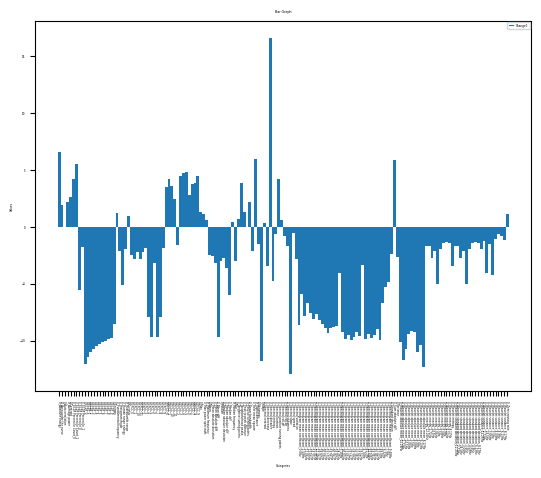

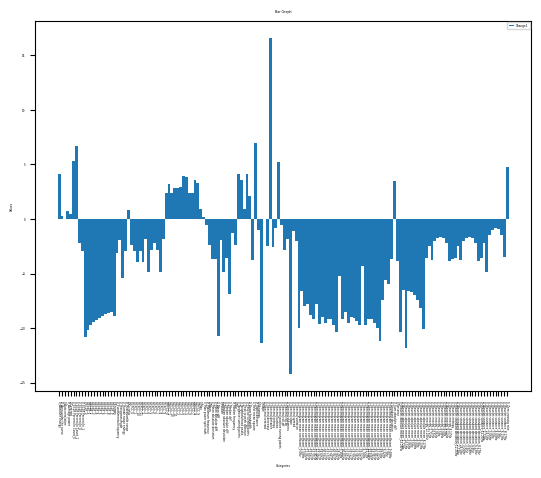

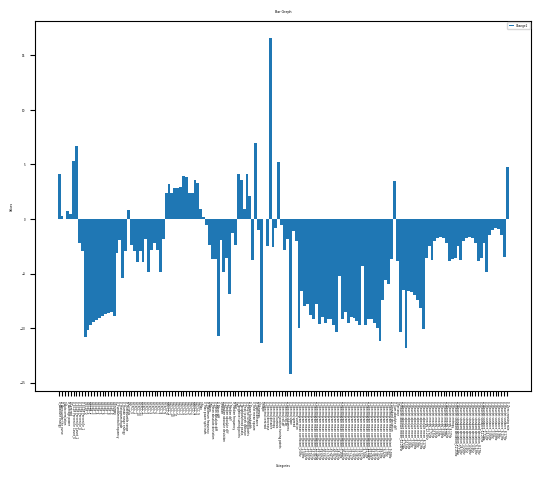

In [35]:
t = titles[:156]
for i in range(diff_mat_n.shape[0]):
    plt.bar(t, np.log(np.abs(diff_mat_n[i,:])), width=1, label = f"Change{i}")
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.rcParams.update({'font.size': 2})
    plt.xticks(rotation=270)
    plt.title('Bar Graph')
    plt.legend()
    plt.show()

20 0
20 1
20 2


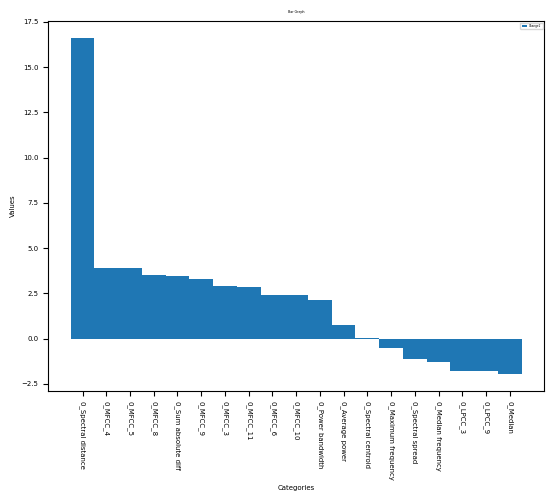

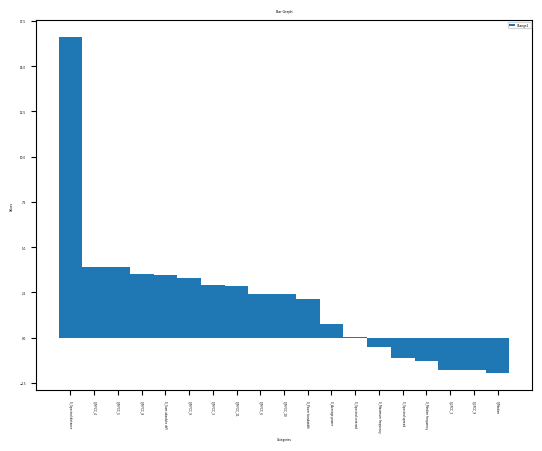

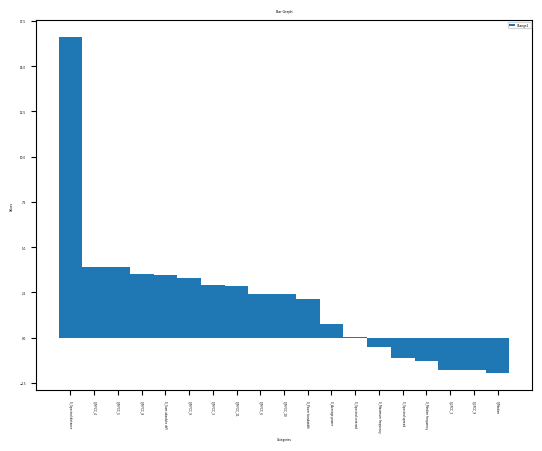

In [59]:
ti_feat = {}
cal_feat = {}
for i in range(diff_mat_n.shape[0]):
    sort_c = np.sort(diff_mat_n[i,:], kind="mergesort")
    arr_t = np.array(t)
    real_feat = []
    comp_fact_n = []
    for a in sort_c[:20]:
        real_feat.append(arr_t[np.where(diff_mat_n[i,:]==a)[0][0]])
        comp_fact_n.append(diff_mat_n[i,:][np.where(diff_mat_n[i,:]==a)[0][0]])
    print(len(real_feat), i)
    ti_feat[i] = real_feat
    cal_feat[i] = comp_fact_n

for j in ti_feat.keys():
    plt.bar(ti_feat[i], np.log(np.abs(cal_feat[i])), width=1, label = f"Change{i}")
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.rcParams.update({'font.size': 2})
    plt.xticks(rotation=270)
    plt.title('Bar Graph')
    plt.legend()
    plt.show()
    

        